In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
from tqdm import tqdm
%matplotlib inline

In [2]:
arr = np.load(os.path.join('..','data','chat_vectors_100.npy'))

In [20]:
chats = pd.read_csv(os.path.join('..','data','clean_text.csv'))

In [84]:
mindist = 100.
for i in tqdm(range(len(arr))):
    if i != 37:
        dist = cosine(arr[37],arr[i])
#         dist = np.linalg.norm(arr[15]-arr[i])
        if dist < mindist:
            mindist = dist
            print(i)

  1%|          | 9881/933800 [00:00<00:18, 49392.86it/s]

0
6
7
15
80
146
489
644
1946


  8%|▊         | 70691/933800 [00:01<00:17, 50487.51it/s]

65321
68211


 28%|██▊       | 259576/933800 [00:05<00:13, 50814.62it/s]/usr/local/lib/python3.6/dist-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 933800/933800 [00:20<00:00, 45579.85it/s]


In [83]:
chats['text'].ix[37]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'buy and thanks me later'

In [85]:
chats['text'].ix[68211]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'buy poe and thanks me later'

In [21]:
chats.head()

,chat_id,chat_title,emoji_list,sender_first_name,sender_id,sender_is_bot,sender_last_name,sender_username,text,timestamp,clean_text,words_count,repeats,has_digit
0,1129149026,Pareto Network - Discussion,[],Bezant,526106862,False,None,None,admin disputes in private thank you.,1524284160,admin disputes in private thank you,6,1,False
1,1129149026,Pareto Network - Discussion,[],Sheriff,538526216,False,None,None,i see binance add coins all the time on the cr...,1524284160,i see binance add coins all the time on the cr...,29,1,False
2,1129149026,Pareto Network - Discussion,[],Sheriff,538526216,False,None,None,shouldn’t it go up with btc though?,1524285978,shouldn t it go up with btc though,8,1,False
3,1146170349,Binance English,[],Vijay,494914527,False,Singh,None,no i wanna fuck you hard.,1524287086,no i wanna fuck you hard,6,1,False
4,1146170349,Binance English,[],A5,548628461,False,None,None,speak english you fukin immigrant . lol you geek,1524286965,speak english you fukin immigrant lol you geek,8,1,False


In [86]:
top_chats = list(chats['chat_title'].value_counts()[:5].index)

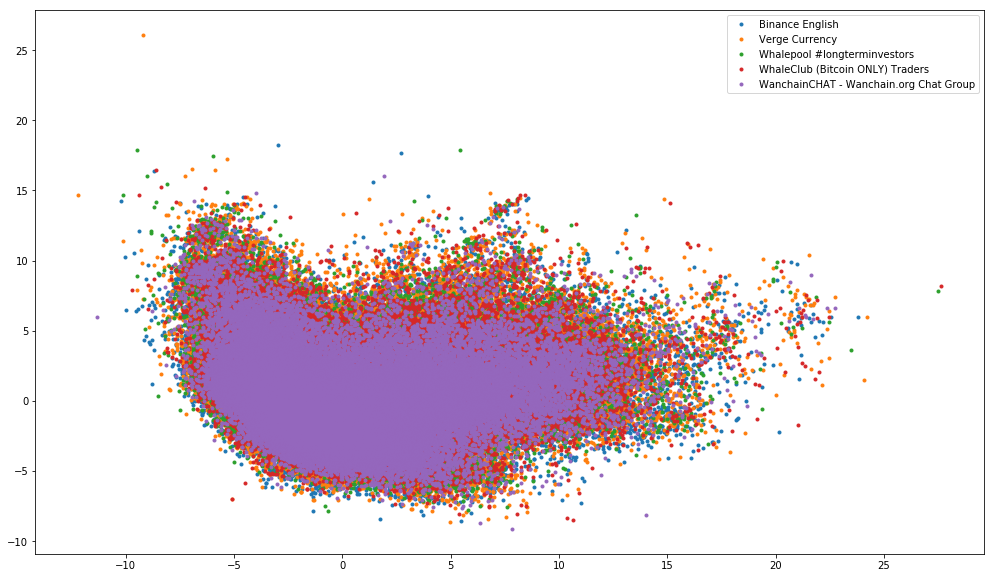

In [87]:
plt.figure(figsize=(17,10))
pca = PCA(n_components=2)
pca.fit(arr)
for chat in top_chats:
    X = pca.transform(arr[chats['chat_title'] == chat])
    plt.plot(X[:,0],X[:,1],'.',label=chat)
plt.legend(loc='best')

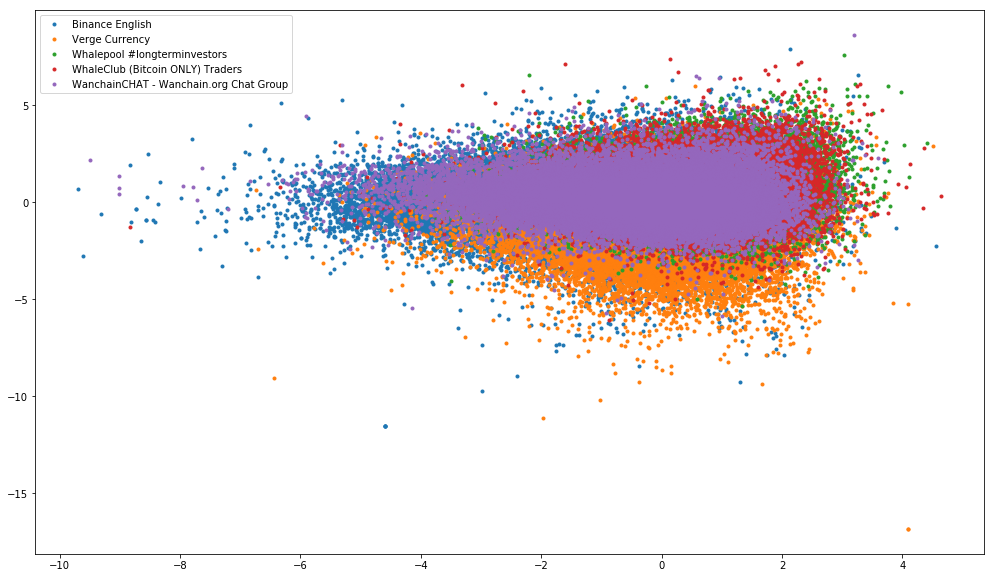

In [88]:
plt.figure(figsize=(17,10))
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(arr[chats['chat_title'].isin(top_chats)],chats['chat_title'].loc[chats['chat_title'].isin(top_chats)])
for chat in top_chats:
    X = lda.transform(arr[chats['chat_title'] == chat])
    plt.plot(X[:,0],X[:,1],'.',label=chat)
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(17,10))
tsne = TSNE(n_iter=250)
tsne.fit(arr[chats['chat_title'].isin(top_chats)])
for chat in top_chats:
    X = tsne.transform(arr[chats['chat_title'] == chat])
    plt.plot(X[:,0],X[:,1],'.',label=chat)
plt.legend(loc='best')